# Micro Credit Defaulter Project (Flip Robo Technologies)

### Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

### Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

### Points to Remember:

•	There are no null values in the dataset. 

•	There may be some customers with no loan history. 

•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.

•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.

•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  


In [1]:
# Let's import some necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the dataset

dataset = pd.read_csv("Data file.csv")
dataset.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [3]:
# Let's set option to display all the rows

pd.set_option("display.max_rows", None)

In [4]:
# Shape of the dataset

dataset.shape

(209593, 37)

There are 209593 Rows and 37 Columns

In [5]:
# Let's check null values

dataset.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Not a single columns has null values. This looks good.

In [6]:
# Quick information about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

This dataset has only 3 object columns.

In [7]:
# Let's check the value counts of pcircle column only

dataset['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

This column has only 1 value. So, let's drop it

In [8]:
# Dropping the columns which is not useful

dataset.drop(columns=['Unnamed: 0', 'pcircle'], axis=1, inplace=True)

1    183431
0     26162
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

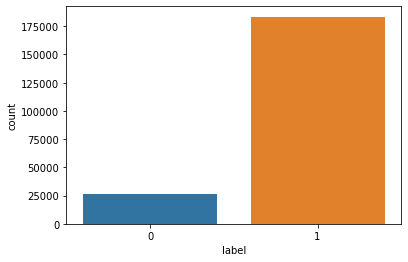

In [9]:
# Let's check the target columns

print(dataset['label'].value_counts())
sns.countplot(dataset['label'])

This dataset has impalanced issue. We will treat it later.

In [10]:
# Let's convert date columns object to float or int

dataset['pdate'] = pd.to_numeric(dataset['pdate'].str.replace("-",""))
dataset['pdate'].dtype

dtype('int64')

In [11]:
# Let's convert msisdn column object to float or int

dataset['msisdn'] = pd.to_numeric(dataset['msisdn'].str.replace("I",""))
dataset['msisdn'].dtype

dtype('int64')

In [12]:
# Let's check again Quick information about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int64  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

It seems that there is not a single column in object form. This looks good

In [13]:
# Let's check the 0 value counts of each columns

for col in dataset:
    print(col +" = "+str(dataset[dataset[col]==0].shape[0]))

label = 26162
msisdn = 0
aon = 0
daily_decr30 = 4144
daily_decr90 = 4063
rental30 = 7566
rental90 = 6918
last_rech_date_ma = 20743
last_rech_date_da = 202861
last_rech_amt_ma = 20995
cnt_ma_rech30 = 27979
fr_ma_rech30 = 78683
sumamnt_ma_rech30 = 27979
medianamnt_ma_rech30 = 27979
medianmarechprebal30 = 30680
cnt_ma_rech90 = 20950
fr_ma_rech90 = 65753
sumamnt_ma_rech90 = 20950
medianamnt_ma_rech90 = 20950
medianmarechprebal90 = 23391
cnt_da_rech30 = 205479
fr_da_rech30 = 208014
cnt_da_rech90 = 204226
fr_da_rech90 = 208728
cnt_loans30 = 3259
amnt_loans30 = 3259
maxamnt_loans30 = 3244
medianamnt_loans30 = 195445
cnt_loans90 = 2036
amnt_loans90 = 2043
maxamnt_loans90 = 2043
medianamnt_loans90 = 197424
payback30 = 106712
payback90 = 95699
pdate = 0


<AxesSubplot:xlabel='label', ylabel='aon'>

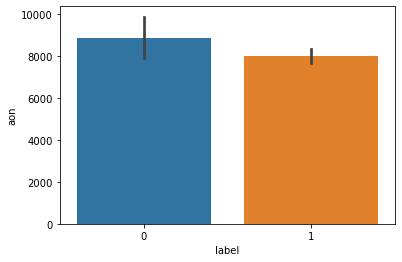

In [14]:
# Let's check the age on cellular network in days

#plt.figure(figsize=(10,3))
sns.barplot(x="label", y="aon", data=dataset)

<AxesSubplot:xlabel='label', ylabel='payback30'>

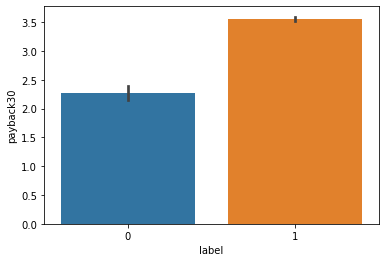

In [15]:
# Average payback time in days over last 30 days

#plt.figure(figsize=(15,4))
sns.barplot(x='label',y="payback30",data=dataset)

<AxesSubplot:xlabel='label', ylabel='payback90'>

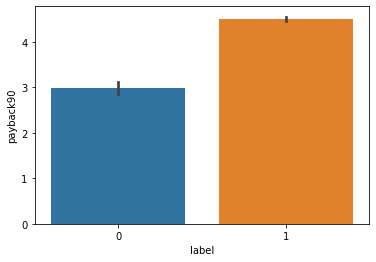

In [16]:
# Average payback time in days over last 90 days

#plt.figure(figsize=(15,4))
sns.barplot(x='label',y="payback90",data=dataset)

<AxesSubplot:xlabel='label', ylabel='maxamnt_loans30'>

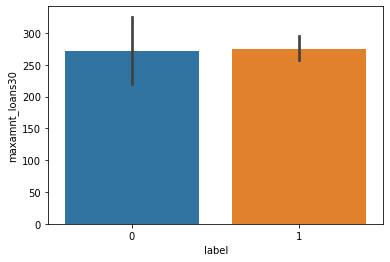

In [17]:
# Maximum amount of loan taken by the user in last 30 days

#plt.figure(figsize=(15,4))
sns.barplot(x='label',y="maxamnt_loans30",data=dataset)

<AxesSubplot:xlabel='label', ylabel='amnt_loans30'>

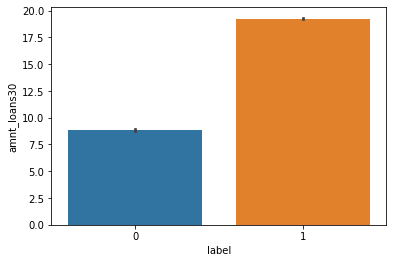

In [18]:
# Total amount of loan taken by the user in last 30 days

sns.barplot(y='amnt_loans30', data=dataset, x='label')

In [19]:
# Let's check the matrix

dataset.corr()

label    msisdn       aon  daily_decr30  \
label                 1.000000  0.001945 -0.003785      0.168298   
msisdn                0.001945  1.000000  0.000555      0.000669   
aon                  -0.003785  0.000555  1.000000      0.001104   
daily_decr30          0.168298  0.000669  0.001104      1.000000   
daily_decr90          0.166150  0.000903  0.000374      0.977704   
rental30              0.058085 -0.001437 -0.000960      0.442066   
rental90              0.075521 -0.000728 -0.000790      0.458977   
last_rech_date_ma     0.003728 -0.000949  0.001692      0.000487   
last_rech_date_da     0.001711  0.001404 -0.001693     -0.001636   
last_rech_amt_ma      0.131804 -0.002356  0.004256      0.275837   
cnt_ma_rech30         0.237331  0.000585 -0.003148      0.451385   
fr_ma_rech30          0.001330 -0.001812 -0.001163     -0.000577   
sumamnt_ma_rech30     0.202828  0.001074  0.000707      0.636536   
medianamnt_ma_rech30  0.141490  0.000669  0.004306      0.295356   
medianmarechprebal30 -0.004829 -0.000253  0.003930     -0.001153   
cnt_ma_rech90         0.236392 -0.001919 -0.002725      0.587338   
fr_ma_rech90          0.084385 -0.004409  0.004401     -0.078299   
sumamnt_ma_rech90     0.205793 -0.000974  0.001011      0.762981   
medianamnt_ma_rech90  0.120855 -0.000621  0.004909      0.257847   
medianmarechprebal90  0.039300 -0.000574 -0.000859      0.037495   
cnt_da_rech30         0.003827 -0.001739  0.001564      0.000700   
fr_da_rech30         -0.000027 -0.000274  0.000892     -0.001499   
cnt_da_rech90         0.002999  0.004556  0.001121      0.038814   
fr_da_rech90         -0.005418 -0.002249  0.005395      0.020673   
cnt_loans30           0.196283  0.001735 -0.001826      0.366116   
amnt_loans30          0.197272  0.002138 -0.001726      0.471492   
maxamnt_loans30       0.000248 -0.000761 -0.002764     -0.000028   
medianamnt_loans30    0.044589  0.000988  0.004664     -0.011610   
cnt_loans90           0.004733  0.001908 -0.000611      0.008962   
amnt_loans90          0.199788 -0.000222 -0.002319      0.563496   
maxamnt_loans90       0.084144  0.003283 -0.001191      0.400199   
medianamnt_loans90    0.035747  0.001213  0.002771     -0.037305   
payback30             0.048336  0.002907  0.001940      0.026915   
payback90             0.049183  0.002655  0.002203      0.047175   
pdate                 0.159308 -0.002798 -0.001828      0.531348   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
label                     0.166150  0.058085  0.075521           0.003728   
msisdn                    0.000903 -0.001437 -0.000728          -0.000949   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004311   
fr_ma_rech30             -0.000343 -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30         0.603886  0.272649  0.259709           0.002105   
medianamnt_ma_rech30      0.282960  0.129853  0.120242          -0.001358   
medianmarechprebal30     -0.000746 -0.001415 -0.001237           0.004071   
cnt_ma_rech90             0.593069  0.312118  0.345293           0.004263   
fr_ma_rech90             -0.079530 -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90         0.768817  0.342306  0.360601           0.002243   
medianamnt_ma_rech90      0.250518  0.110356  0.103151          -0.000726   
medianmarechprebal90      0.036382  

Text(0.5, 1.0, 'Correlation Matrix')

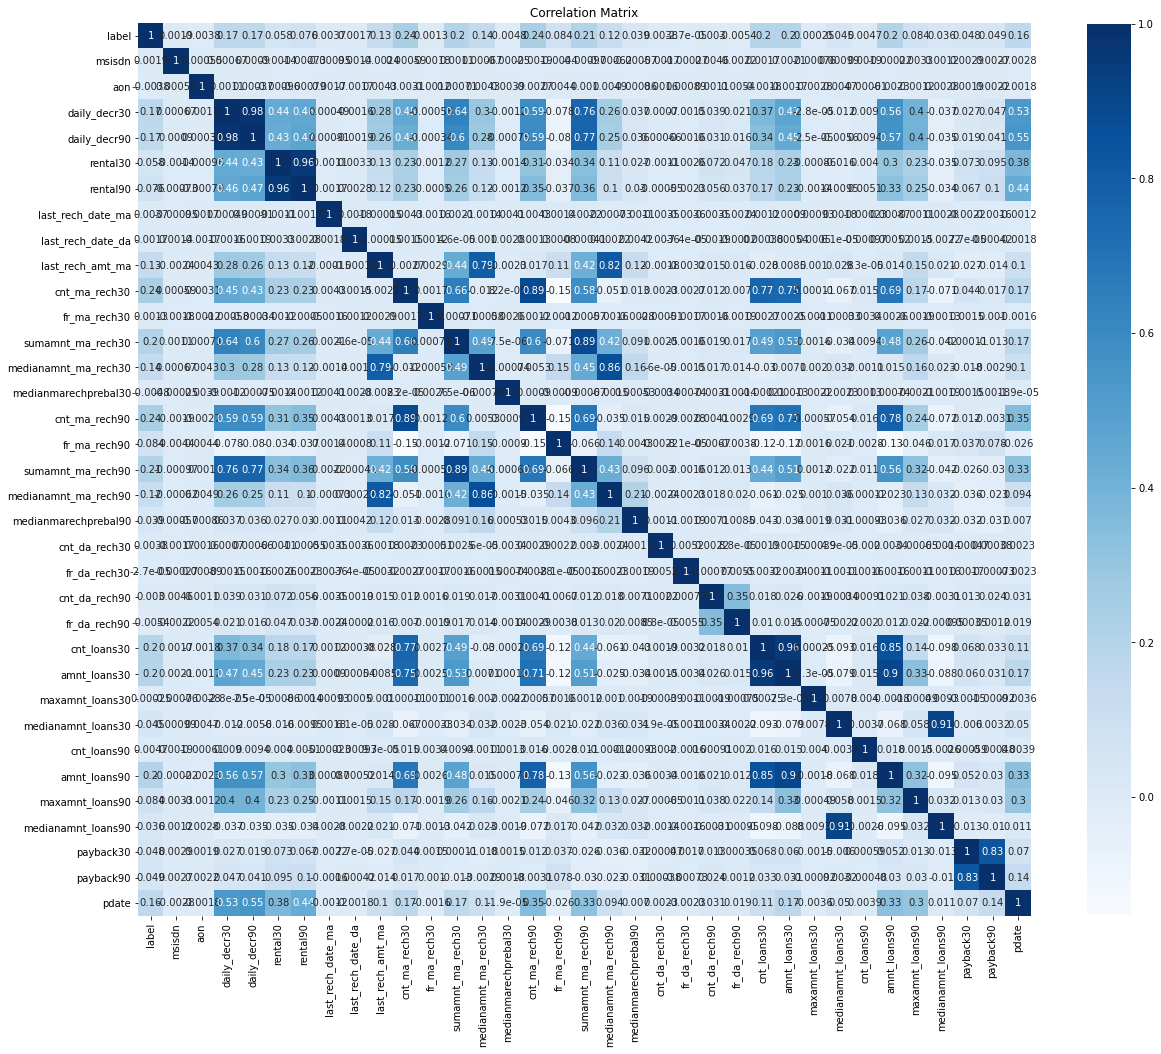

In [20]:
# Let's creat a heatmap for better visualization

corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cbar=True, annot=True, square=True, cmap="Blues",fmt='.2g', cbar_kws={"shrink":.82}, annot_kws={"size":10})
plt.title("Correlation Matrix")

It seems that few columns are highly correlated to each one.

In [21]:
# Dropping the highlye correlated features

dataset.drop(columns = ["daily_decr30", 'rental30', 'cnt_loans30', 'cnt_loans90', 'payback30'], axis=1, inplace=True)

In [22]:
# While analyzing the excel file, I found some columns which has un-realistic data. So, let's drop that columns

dataset.drop(columns = ['aon', 'last_rech_date_ma','last_rech_date_da','maxamnt_loans30',
                        'medianmarechprebal90','daily_decr90'], axis=1,inplace=True)

In [23]:
# Let's check the skewness

print(dataset.skew())
print("Total Number of Numeric columns count : ",len(dataset.skew()))
print("Total Number of columns which are significant skewed : ", len(dataset.skew().loc[abs(dataset.skew()>0.5)]))

label                   -2.270254
msisdn                   0.018124
rental90                 4.437681
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
amnt_loans30             2.975719
medianamnt_loans30       4.551043
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback90                6.899951
pdate                    0.289201
dtype: float64
Total Number of Numeric columns count :  24
Total Number of columns which are significant skewed :  21


In [24]:
# Let's remore the skewness

for index in dataset.skew().index:
    if dataset.skew().loc[index]>0.5:
        dataset[index] = np.log1p(dataset[index])
    if dataset.skew().loc[index]<-0.5:
        dataset[index] = np.square(dataset[index])

In [25]:
# Let's check the skewness

print(dataset.skew())
print("Total Number of Numeric columns count : ",len(dataset.skew()))
print("Total Number of columns which are significant skewed : ", len(dataset.skew().loc[abs(dataset.skew()>0.5)]))

label                   -2.270254
msisdn                   0.018124
rental90                -0.068978
last_rech_amt_ma        -1.127006
cnt_ma_rech30           -0.002013
fr_ma_rech30             4.071763
sumamnt_ma_rech30       -1.004266
medianamnt_ma_rech30    -1.119992
medianmarechprebal30     0.287245
cnt_ma_rech90           -0.033410
fr_ma_rech90             0.518606
sumamnt_ma_rech90       -0.999947
medianamnt_ma_rech90    -1.217806
cnt_da_rech30           13.709136
fr_da_rech30            13.840685
cnt_da_rech90            8.491552
fr_da_rech90            18.083017
amnt_loans30            -0.026725
medianamnt_loans30       3.995359
amnt_loans90             0.241660
maxamnt_loans90          1.171838
medianamnt_loans90       4.339969
payback90                0.765125
pdate                    0.289201
dtype: float64
Total Number of Numeric columns count :  24
Total Number of columns which are significant skewed :  10


In [26]:
# Let's again check the null values if any exists

dataset.isnull().sum()

label                      0
msisdn                     0
rental90                5905
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1646
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
amnt_loans30               0
medianamnt_loans30         0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback90                  0
pdate                      0
dtype: int64

It seems that now the dataste has null values after treating all the dataset. So, let's deals with it...

In [27]:
# Let's fill the null values with their mean values

dataset['rental90'] = dataset['rental90'].fillna(dataset['rental90'].mean())
dataset['medianmarechprebal30'] = dataset['medianmarechprebal30'].fillna(dataset['medianmarechprebal30'].mean())

In [28]:
# Let's separate the input and output columns

x = dataset.drop(columns=['label'], axis=1)
y = dataset['label']

Shape of the dataset before over_sampling :  (209593, 23)
Shape of the dataset after over_sampling :  (366862, 23)
1    183431
0    183431
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

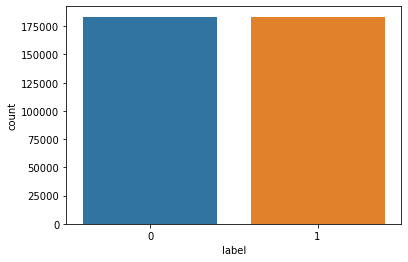

In [29]:
# As we already discussed that this dataset has class imbalanced issue. So, let's fix it

print("Shape of the dataset before over_sampling : ",x.shape)

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

print("Shape of the dataset after over_sampling : ",x.shape)
print(y.value_counts())
sns.countplot(y)

Now the class imbalanced issues has been fixed...

Number of components explained 95% variance :  16


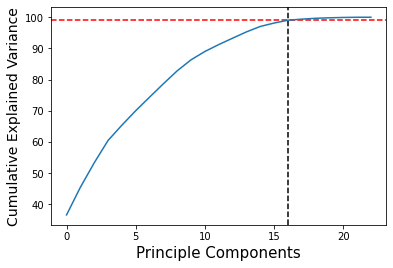

In [30]:
# Let's check the PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
df_x = scale.fit_transform(x)

x_pca = PCA()
x_pca.fit(df_x)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>99)

print("Number of components explained 95% variance : ",k)
plt.xlabel("Principle Components", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axhline(y=99, color='r', linestyle='--')
plt.axvline(x=k, color='k', linestyle='--')
plt.plot(var_cumu)
plt.show()

Out of 23 features, only 16 features is giving the 99% variance. So, let's use the PCA technique...

In [31]:
# Let's use PCA for better result

pca = PCA(n_components=16)
X = pca.fit_transform(df_x)
X

array([[ 1.6261434 , -0.0995494 , -0.50182035, ...,  0.06300786,
        -0.26729006,  0.43150977],
       [ 1.94805541,  0.16863993,  0.01992986, ...,  0.57579088,
        -0.24160931, -0.47132482],
       [-0.25389723,  0.57989696, -0.81856266, ..., -0.25160605,
        -0.17385524, -0.55899501],
       ...,
       [ 2.19080048,  1.67177764, -2.23268424, ..., -0.49474035,
         0.04053658,  0.24223301],
       [-5.12516145, -0.87936166,  0.50702914, ...,  0.06040837,
         0.01123504,  0.13958397],
       [-3.5431053 , -0.58822718,  0.22797153, ...,  0.6544626 ,
         0.03845213, -0.02926533]])

In [32]:
# Let's import the necessary libraries for model building

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, plot_roc_curve
from time import time

In [33]:
# Let's find the best random state

#def bestmodel(model):
#    max_score = 0
#    max_state = 0
#    start = time()
#    for i in range(1,200):
#        x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
#        model.fit(x_train, y_train)
#        y_pre = model.predict(x_test)
#        score = accuracy_score(y_test, y_pre)
#        if score > max_score:
#            max_score = score
#            max_state = i
#    print("Best Random State is      : ",max_state)
#    print("Best Accuracy Score is    : ",max_score)
#    print("Cross Validation Score is : ",cross_val_score(model, X, y, cv=5).mean())
#    end = time()
#    print("\nTime taken by the model for prediction {:.4f} seconds".format(end-start))

In [34]:
def bestmodel(model):
    start = time()
    x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
    model.fit(x_train, y_train)  
    y_pre = model.predict(x_test)
    score = accuracy_score(y_test, y_pre)
    print("Best Accuracy Score is    : ",score)
    print("Cross Validation Score is : ",cross_val_score(model, X, y, cv=5).mean())
    end = time()
    print("\nTime taken by the model for prediction {:.4f} seconds".format(end-start))

In [35]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
bestmodel(LR)

Best Accuracy Score is    :  0.7757622013547217
Cross Validation Score is :  0.774896317667517

Time taken by the model for prediction 6.7892 seconds


In [38]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
bestmodel(RFC)

Best Accuracy Score is    :  0.9022256143267959
Cross Validation Score is :  0.8980544722611604

Time taken by the model for prediction 2023.8018 seconds


In [40]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
bestmodel(DTC)

Best Accuracy Score is    :  0.8438390143513281
Cross Validation Score is :  0.8395147411698354

Time taken by the model for prediction 129.3407 seconds


In [41]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()
bestmodel(KNC)

Best Accuracy Score is    :  0.8814141441674731
Cross Validation Score is :  0.877989680593879

Time taken by the model for prediction 4843.6483 seconds


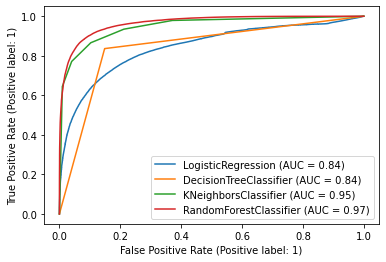

In [42]:
# Let's plot ROC AUC curve

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 6)

disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTC, x_test, y_test, ax = disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax = disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax = disp.ax_)
plt.legend(prop={"size":10}, loc='lower right')
plt.show()

#### After analyzing the accuracy score, cross validation score and roc curve. Now it is clear that Random Forest Classifier is giving the best score. So, let's try to increase the score using HyperParameter Tuning.

In [44]:
# Final Model with HyperParameter Tuning

from sklearn.model_selection import GridSearchCV

#param_grid = {"n_estimators":[100,200],"criterion" : ['gini','entropy'], "min_samples_split" : [2,3], "min_samples_leaf":[1,2]}
#grid_search = GridSearchCV(RFC, param_grid)
#grid_search.fit(x_train, y_train)
#grid_serach.best_params_

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 6)
Final_Model = RandomForestClassifier(n_estimators = 100, criterion='gini', min_samples_leaf=1,min_samples_split=2)
Final_Model.fit(x_train, y_train)
y_pred = Final_Model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9015305357556594

As we can see that after hyperparameter tuning random forest classifier has been failed to increase its score. So, Let's use the previous random forest model as our final model.

In [45]:
# Saving the final model

import joblib

joblib.dump(RFC, 'Micro Credit Project.pkl')

['Micro Credit Project.pkl']

In [46]:
# Loading the final model

model = joblib.load('Micro Credit Project.pkl')
prediction = pd.DataFrame(model.predict(X))